In [1]:
### Importing GIS Libraries
import geopandas as gpd
import plotly.graph_objects as go

### Importing data preprocessing & visualization libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Importing warning library
import warnings
warnings.filterwarnings("ignore")


from sklearn.cluster import KMeans  #### Sklearn lib for K-Means Clustering


In [2]:
df = pd.read_csv('kings_data_v1.csv')
df.head(2)

,Unnamed: 0,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,...,count_emp_447110,popden_447110,popden_sales_447110,popden_emp_447110,aden_447110,aden_sales_447110,aden_emp_447110,State_Code_y.1,County_Code_y.1,mrFEI
0,0,36,47,57800,1400000US36047057800,36047057800,578.0,CT,172233,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.291667
1,1,36,47,58900,1400000US36047058900,36047058900,589.0,CT,424025,38353,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.333333


In [3]:
df['TRACTCE'] = df['TRACTCE'].apply(lambda x: f'0{x}')

In [4]:
# Assuming df is your DataFrame
columns_to_drop = ['Unnamed: 0', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'AWATER', 'ALAND', 'geometry']
df.drop(columns=columns_to_drop, inplace=True)

In [5]:
df

,STATEFP,COUNTYFP,TRACTCE,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,...,count_emp_447110,popden_447110,popden_sales_447110,popden_emp_447110,aden_447110,aden_sales_447110,aden_emp_447110,State_Code_y.1,County_Code_y.1,mrFEI
0,36,47,057800,36047057800,New York,Kings County,1,3176,1077,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.291667
1,36,47,058900,36047058900,New York,Kings County,1,1904,813,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.333333
2,36,47,037000,36047037000,New York,Kings County,1,4085,1566,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.285714
3,36,47,019900,36047019900,New York,Kings County,1,2929,1476,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.375000
4,36,47,040000,36047040000,New York,Kings County,1,3069,1104,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,36,47,039700,36047039700,New York,Kings County,1,3389,1211,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.625000
750,36,47,010200,36047010200,New York,Kings County,1,5622,1422,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.322581
751,36,47,082600,36047082600,New York,Kings County,1,5513,1929,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.300000
752,36,47,023400,36047023400,New York,Kings County,1,5059,1455,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,36,47,0.400000


In [6]:
### Storing New York Map coordinates of 2019 as a pandas dataframe
ny_map = gpd.read_file(r'C:\Users\tuhin\OneDrive\Desktop\Omdena Brooklyn\cb_2019_36_tract_500k.shp', encoding='utf-8')

In [7]:
### Checking how the dataframe looks like
ny_map.head(2)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,36,071,000502,1400000US36071000502,36071000502,5.02,CT,967431,969216,"POLYGON ((-74.02226 41.49281, -74.02180 41.496..."
1,36,103,135208,1400000US36103135208,36103135208,1352.08,CT,2287077,0,"POLYGON ((-73.28263 40.83063, -73.28157 40.832..."


In [8]:
### Checking if all New York Counties are present in the dataframe

print("The total number of counties present in New York is", ny_map['COUNTYFP'].nunique())

print("Showing all county codes")
ny_map["COUNTYFP"].unique()

The total number of counties present in New York is 62
Showing all county codes


array(['071', '103', '047', '055', '005', '029', '061', '119', '033',
       '001', '085', '069', '067', '081', '007', '107', '051', '059',
       '073', '015', '063', '053', '065', '083', '027', '117', '009',
       '057', '037', '093', '021', '087', '121', '111', '105', '043',
       '019', '109', '023', '011', '113', '091', '035', '013', '099',
       '075', '039', '089', '045', '101', '095', '003', '025', '049',
       '097', '115', '017', '031', '077', '079', '123', '041'],
      dtype=object)

In [9]:
## Select "Kings County" which is code - 047 (Brooklyn Borough)

kings_map = ny_map[ny_map["COUNTYFP"]=="047"]

In [10]:
## Checking the column headers of kings dataframe
kings_map.head(5)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
2,36,047,057800,1400000US36047057800,36047057800,578,CT,172233,0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601..."
3,36,047,058900,1400000US36047058900,36047058900,589,CT,424025,38353,"POLYGON ((-73.94605 40.72926, -73.94419 40.729..."
18,36,047,037000,1400000US36047037000,36047037000,370,CT,336242,0,"POLYGON ((-73.96615 40.58667, -73.96564 40.588..."
19,36,047,019900,1400000US36047019900,36047019900,199,CT,188914,0,"POLYGON ((-73.96949 40.68629, -73.96749 40.686..."
26,36,047,040000,1400000US36047040000,36047040000,400,CT,192000,0,"POLYGON ((-73.98078 40.59845, -73.97986 40.598..."


In [11]:
df3 = pd.merge(df, kings_map, on='TRACTCE', how='left')

In [12]:
df3

,STATEFP_x,COUNTYFP_x,TRACTCE,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,...,mrFEI,STATEFP_y,COUNTYFP_y,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,36,47,057800,36047057800,New York,Kings County,1,3176,1077,0,...,0.291667,36,047,1400000US36047057800,36047057800,578,CT,172233.0,0.0,"POLYGON ((-73.95398 40.60140, -73.95304 40.601..."
1,36,47,058900,36047058900,New York,Kings County,1,1904,813,0,...,0.333333,36,047,1400000US36047058900,36047058900,589,CT,424025.0,38353.0,"POLYGON ((-73.94605 40.72926, -73.94419 40.729..."
2,36,47,037000,36047037000,New York,Kings County,1,4085,1566,0,...,0.285714,36,047,1400000US36047037000,36047037000,370,CT,336242.0,0.0,"POLYGON ((-73.96615 40.58667, -73.96564 40.588..."
3,36,47,019900,36047019900,New York,Kings County,1,2929,1476,0,...,0.375000,36,047,1400000US36047019900,36047019900,199,CT,188914.0,0.0,"POLYGON ((-73.96949 40.68629, -73.96749 40.686..."
4,36,47,040000,36047040000,New York,Kings County,1,3069,1104,0,...,0.214286,36,047,1400000US36047040000,36047040000,400,CT,192000.0,0.0,"POLYGON ((-73.98078 40.59845, -73.97986 40.598..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,36,47,039700,36047039700,New York,Kings County,1,3389,1211,0,...,0.625000,36,047,1400000US36047039700,36047039700,397,CT,159158.0,0.0,"POLYGON ((-73.92439 40.69083, -73.92364 40.690..."
750,36,47,010200,36047010200,New York,Kings County,1,5622,1422,0,...,0.322581,36,047,1400000US36047010200,36047010200,102,CT,152450.0,0.0,"POLYGON ((-74.01556 40.64007, -74.01498 40.640..."
751,36,47,082600,36047082600,New York,Kings County,1,5513,1929,0,...,0.300000,36,047,1400000US36047082600,36047082600,826,CT,199092.0,0.0,"POLYGON ((-73.95205 40.64677, -73.94915 40.646..."
752,36,47,023400,36047023400,New York,Kings County,1,5059,1455,0,...,0.400000,36,047,1400000US36047023400,36047023400,234,CT,169784.0,0.0,"POLYGON ((-73.99154 40.63558, -73.99096 40.636..."


In [139]:
df1 = pd.DataFrame()

In [140]:
df1['TRACTCE'] = df3['TRACTCE']

In [141]:
#df1['affluence'] = df3['AFFLUENCE16_20']

In [142]:
df1['disadvantage'] = df3['DISADVANTAGE16_20']

In [143]:
df1['Medfaminc16_20'] = df3['MEDFAMINC16_20']

In [144]:
df1['Medfaminc16_20'] = pd.to_numeric(df1['Medfaminc16_20'], errors = 'coerce')
#df1['affluence'] = pd.to_numeric(df1['affluence'], errors = 'coerce')
df1['disadvantage'] = pd.to_numeric(df1['disadvantage'], errors = 'coerce')

In [145]:
df1['Medfaminc16_20'] = df1['Medfaminc16_20']/4

In [146]:
df3['snap'] = pd.to_numeric(df3['PPUBAS16_20'], errors='coerce')

In [147]:
df1['SNAP%'] = df3['snap']

In [148]:
df1['PovertyRate'] = df3['PovertyRate']

In [149]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 754 entries, 0 to 753
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRACTCE         754 non-null    object 
 1   disadvantage    711 non-null    float64
 2   Medfaminc16_20  698 non-null    float64
 3   SNAP%           711 non-null    float64
 4   PovertyRate     754 non-null    float64
dtypes: float64(4), object(1)
memory usage: 35.3+ KB


In [150]:
df2 = df1.dropna()

For n_clusters=2, the silhouette score is 0.699137877046486
For n_clusters=3, the silhouette score is 0.5586035920610068
For n_clusters=4, the silhouette score is 0.5275919312685025
For n_clusters=5, the silhouette score is 0.5456697325998409
For n_clusters=6, the silhouette score is 0.5425640982617373
For n_clusters=7, the silhouette score is 0.5433185758573762
For n_clusters=8, the silhouette score is 0.5388471849057064


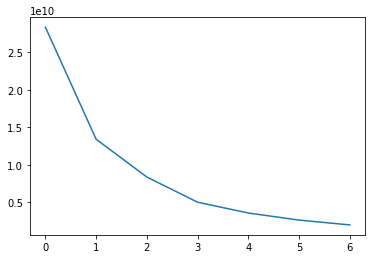

In [151]:

from sklearn.cluster import KMeans

df_cluster1 = df2.drop(["TRACTCE"], axis=1)
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=1000)
kmeans.fit(df_cluster1)

kmeans.labels_
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(df_cluster1)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

# silhouette analysis
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(df_cluster1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_cluster1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [152]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=5, max_iter=500)
kmeans.fit(df2)
kmeans.labels_

array([2, 2, 3, 2, 0, 4, 4, 1, 1, 2, 2, 3, 0, 3, 2, 2, 3, 2, 2, 2, 3, 0,
       0, 0, 1, 2, 3, 2, 4, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 3, 4, 4, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 4, 1, 2, 3, 4, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1,
       2, 4, 4, 2, 4, 1, 1, 1, 4, 4, 2, 0, 2, 3, 2, 1, 0, 2, 4, 2, 2, 4,
       2, 1, 4, 1, 1, 1, 2, 2, 2, 1, 2, 3, 1, 4, 4, 1, 2, 0, 3, 1, 1, 1,
       1, 2, 4, 3, 1, 1, 1, 1, 1, 2, 2, 2, 3, 1, 3, 4, 0, 0, 0, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 4, 0, 2, 2, 1,
       1, 1, 2, 3, 1, 4, 2, 1, 1, 0, 3, 2, 4, 3, 1, 4, 3, 1, 2, 1, 2, 2,
       2, 4, 3, 1, 2, 0, 4, 1, 2, 2, 0, 4, 1, 2, 4, 4, 4, 4, 1, 4, 1, 1,
       1, 4, 2, 1, 1, 2, 2, 2, 1, 1, 4, 4, 2, 0, 0, 1, 0, 1, 1, 3, 4, 2,
       2, 2, 2, 2, 4, 3, 2, 1, 4, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2,
       2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 4, 3, 1, 1, 0, 2, 1, 1, 3, 4, 1, 0,
       2, 2, 0, 2, 0, 0, 0, 3, 4, 2, 1, 1, 4, 1, 2, 1, 2, 2, 3, 2, 3, 4,
       2, 1, 4, 1, 2, 2, 4, 2, 1, 2, 4, 2, 2, 1, 4,

In [153]:
df2

,TRACTCE,disadvantage,Medfaminc16_20,SNAP%,PovertyRate
0,057800,0.253815,21875.00,0.276615,21.6
2,037000,0.214406,21953.25,0.178423,15.6
3,019900,0.079001,40312.50,0.049125,12.4
4,040000,0.199686,13187.50,0.223124,13.4
5,098200,0.521628,6239.00,0.475323,46.8
...,...,...,...,...,...
749,039700,0.292410,15609.50,0.281596,32.1
750,010200,0.221261,14597.00,0.218650,23.1
751,082600,0.216748,16179.75,0.252830,12.8
752,023400,0.552032,7984.50,0.509662,52.1


In [154]:
# assign the label
df2['KMeans Clusters (5 Clusters)'] = kmeans.labels_
df2.head()

,TRACTCE,disadvantage,Medfaminc16_20,SNAP%,PovertyRate,KMeans Clusters (5 Clusters)
0,057800,0.253815,21875.00,0.276615,21.6,2
2,037000,0.214406,21953.25,0.178423,15.6,2
3,019900,0.079001,40312.50,0.049125,12.4,3
4,040000,0.199686,13187.50,0.223124,13.4,2
5,098200,0.521628,6239.00,0.475323,46.8,0


In [155]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 0 to 753
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TRACTCE                       698 non-null    object 
 1   disadvantage                  698 non-null    float64
 2   Medfaminc16_20                698 non-null    float64
 3   SNAP%                         698 non-null    float64
 4   PovertyRate                   698 non-null    float64
 5   KMeans Clusters (5 Clusters)  698 non-null    int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 35.4+ KB


In [156]:
# Merge only the 'Age' column from df2 to df1 based on 'ID'
result = pd.merge(df3, df2[['TRACTCE', 'KMeans Clusters (5 Clusters)']], on='TRACTCE')

In [157]:
result.columns

Index(['STATEFP_x', 'COUNTYFP_x', 'TRACTCE', 'CensusTract', 'State', 'County',
       'Urban', 'Pop2010', 'OHU2010', 'GroupQuartersFlag',
       ...
       'COUNTYFP_y', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER',
       'geometry', 'snap', 'KMeans Clusters (5 Clusters)'],
      dtype='object', length=329)

In [158]:
from geopandas import GeoDataFrame

merged = GeoDataFrame(result)

In [159]:
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 698 entries, 0 to 697
Columns: 329 entries, STATEFP_x to KMeans Clusters (5 Clusters)
dtypes: float64(201), geometry(1), int32(1), int64(82), object(44)
memory usage: 1.8+ MB


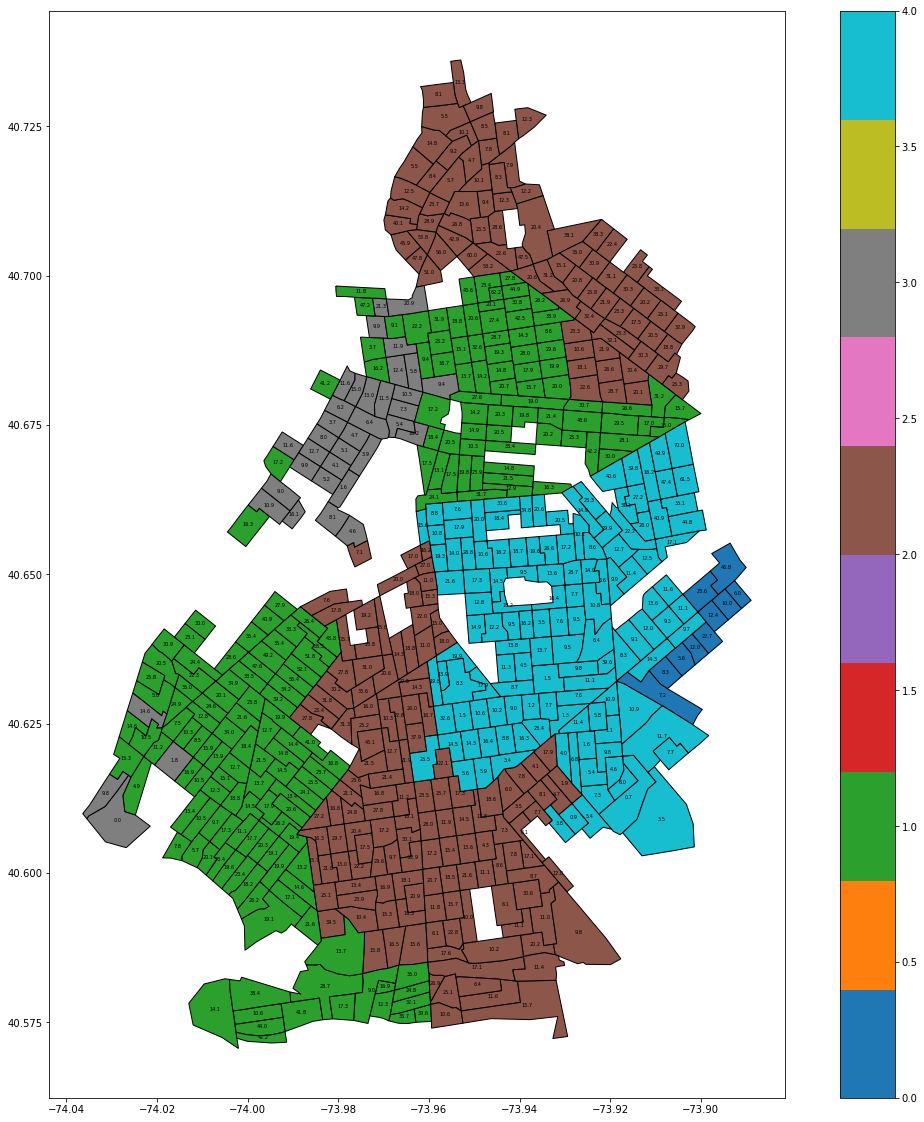

In [160]:
import matplotlib.pyplot as plt

# Assuming 'result' is a GeoDataFrame
fig, ax = plt.subplots(figsize=(20,20))
merged.plot(ax=ax, column='KMeans Clusters (5 Clusters)', cmap='tab10', legend=True, edgecolor='black')
ax.set_title('', fontsize=30)

for idx, row in merged.iterrows():
    if row['geometry'] is not None and row['geometry'].is_valid:
        ax.annotate(text=row['PovertyRate'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize=5)

# Show the plot
plt.show()
